<a href="https://colab.research.google.com/github/doctorpeppercokebear/computer_vision/blob/main/cat_end_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:
from google.colab  import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp ./drive/MyDrive/deeplearning/cat-and-dog.zip ./

In [ ]:
!unzip ./cat-and-dog.zip

In [ ]:
!mkdir cat-and-dog

In [ ]:
!mv archive/test_set cat-and-dog

In [ ]:
!mv archive/training_set cat-and-dog

In [ ]:
train_dir = './cat-and-dog/training_set/training_set'
valid_dir = './cat-and-dog/test_set/test_set'


In [ ]:
image_gen = ImageDataGenerator(rescale=(1./255.))

In [ ]:
print(train_dir + 'cats/cat.1.jpg')

./cat-and-dog/training_set/training_setcats/cat.1.jpg


In [ ]:
image = tf.io.read_file(train_dir + '/cats/cat.1.jpg')
image = tf.image.decode_image(image)
image.shape

TensorShape([280, 300, 3])

In [ ]:
train_gen = image_gen.flow_from_directory(
    train_dir,
    batch_size = 64,
    target_size=(280, 300),
    classes =['cats', 'dogs'],
    class_mode = 'binary',
    seed=2023

)

Found 8005 images belonging to 2 classes.


In [ ]:
valid_gen = image_gen.flow_from_directory(
    valid_dir,
    batch_size = 64,
    target_size=(280, 300),
    classes =['cats', 'dogs'],
    class_mode = 'binary',
    seed=2023

)

Found 2023 images belonging to 2 classes.


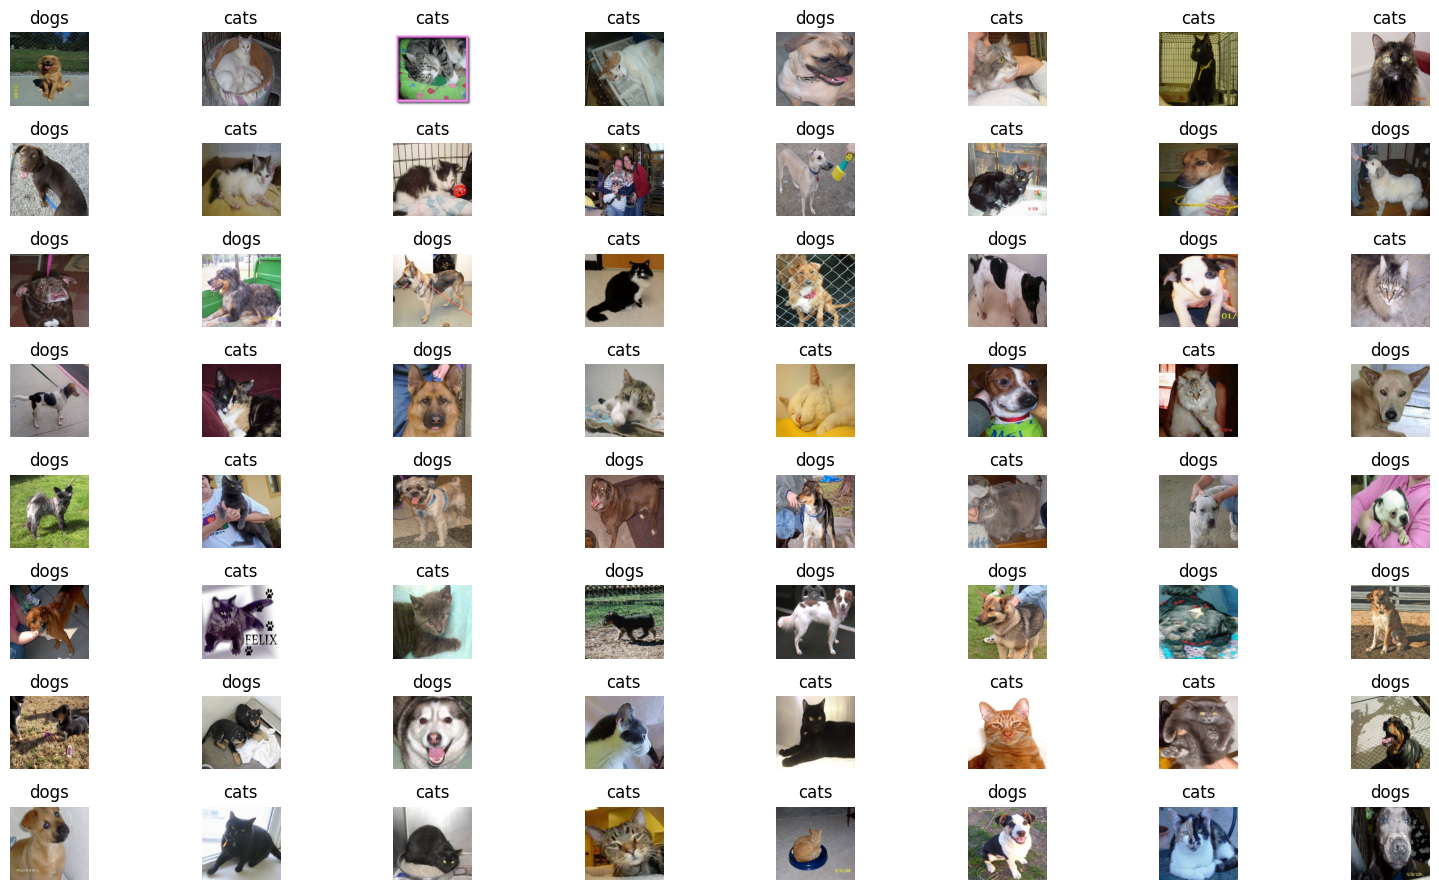

In [ ]:
class_labels = ['cats', 'dogs']
batch = next(train_gen)
images, labels = batch[0], batch[1]
plt.figure(figsize=(16, 9))

for i in range(len(images)):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(images[i])  # 이미지를 표시하는 부분에서 소괄호가 아닌 대괄호를 사용해야 합니다.
    plt.title(class_labels[int(labels[i])])  # class_labels 인덱스에는 정수 값을 사용해야 합니다.
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D((2, 2)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model


In [ ]:
model = build_model()

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
histroy = model.fit(train_gen, validation_data=valid_gen, epochs=20)

Epoch 1/20
126/126 [==============================] - 68s 474ms/step - loss: 4.6907 - accuracy: 0.5383 - val_loss: 0.6815 - val_accuracy: 0.6021
Epoch 2/20
126/126 [==============================] - 57s 451ms/step - loss: 0.6755 - accuracy: 0.5580 - val_loss: 0.6541 - val_accuracy: 0.6194
Epoch 3/20
126/126 [==============================] - 56s 444ms/step - loss: 0.6666 - accuracy: 0.5775 - val_loss: 0.6189 - val_accuracy: 0.6391
Epoch 4/20
126/126 [==============================] - 56s 444ms/step - loss: 0.6556 - accuracy: 0.5803 - val_loss: 0.6414 - val_accuracy: 0.6228
Epoch 5/20
126/126 [==============================] - 57s 449ms/step - loss: 0.6510 - accuracy: 0.5970 - val_loss: 0.6718 - val_accuracy: 0.5927
Epoch 6/20
126/126 [==============================] - 65s 519ms/step - loss: 0.6962 - accuracy: 0.5038 - val_loss: 0.6938 - val_accuracy: 0.4998
Epoch 7/20
126/126 [==============================] - 56s 446ms/step - loss: 0.6935 - accuracy: 0.4997 - val_loss: 0.6933 - val_ac

In [ ]:
from IPython.core import history
import matplotlib.pyplot as plt

# 학습 모델 시각화
def plot_loss_acc(history, epoch):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']  # 'accurycy'를 'accuracy'로 수정합니다.
    val_acc = history.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # 1,1
    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label="Validation")  # 'val_acc'를 'val_loss'로 수정합니다.
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    # Plot Accuracy
    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label="Validation")
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.tight_layout()
    plt.show()




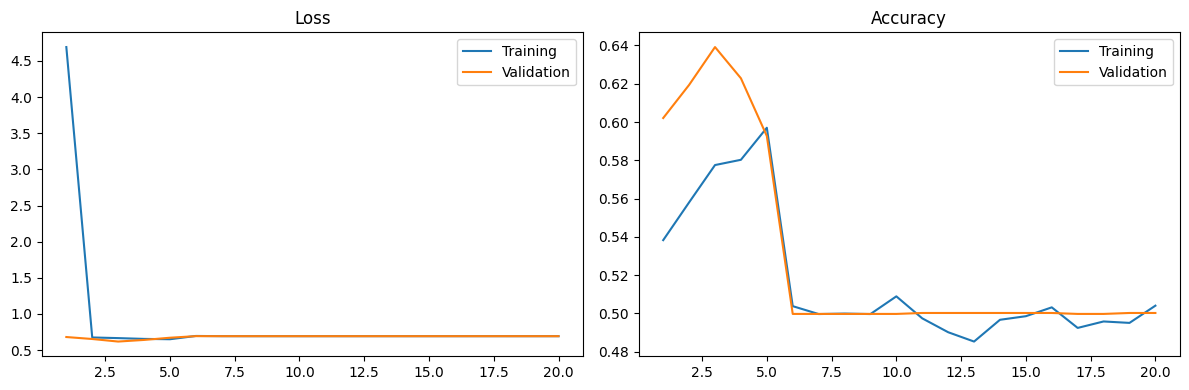

In [ ]:
plot_loss_acc(histroy, 20)